In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

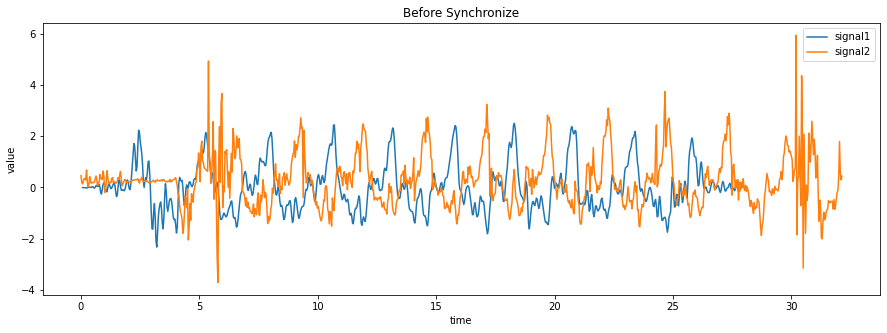

In [14]:
signal1 = pd.read_csv('/content/signal1.csv')
signal2 = pd.read_csv('/content/signal2.csv')


plt.figure(figsize=(15,5))
plt.plot(signal1['time'], signal1['value'], label = 'signal1')
plt.plot(signal2['time'], signal2['value'], label = 'signal2')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Before Synchronize')
plt.legend()
plt.show()

In [15]:
def rfft_xcorr(x, y):
    M = len(x) + len(y) - 1
    N = 2 ** int(np.ceil(np.log2(M)))
    X = np.fft.rfft(x, N)
    Y = np.fft.rfft(y, N)
    cxy = np.fft.irfft(X * np.conj(Y))
    cxy = np.hstack((cxy[:len(x)], cxy[N-len(y)+1:]))
    return cxy

def match(x, ref):
    cxy = rfft_xcorr(x, ref)
    index = np.argmax(cxy)
    if index < len(x):
        return index
    else: # negative lag
        return index - len(cxy)

min_i = match(signal1['value'], signal2['value'])
print("min_i = ", min_i)

min_i =  -117


In [16]:
if min_i < 0 : # 센서 데이터가 앞서있다면 ( 센서 데이터를 오른쪽으로 이동해야 한다면)
    signal2 = signal2[-min_i:].copy()    
    
else :         # 센서 데이터가 뒤쳐져있다면   ( 센서 데이터를 왼쪽으로 이동해야 한다면)    
    signal1 = signal1[min_i:].copy()
    


signal1['time']    = (signal1['time']    - signal1['time'].min())
signal2['time']    = (signal2['time']    - signal2['time'].min())

signal1.reset_index(drop = True, inplace = True)
signal2.reset_index(drop = True, inplace = True)

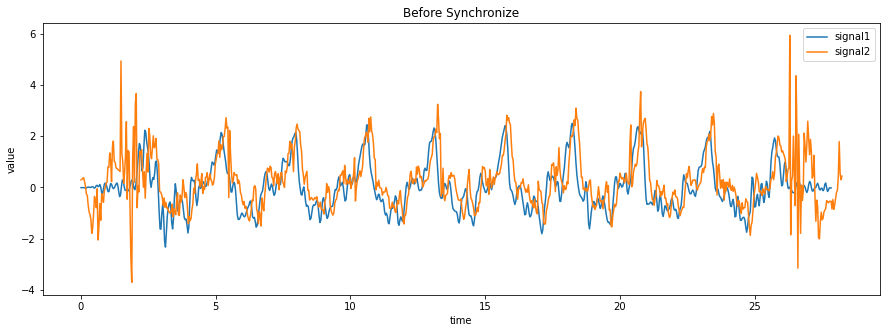

In [17]:
plt.figure(figsize=(15,5))
plt.plot(signal1['time'], signal1['value'], label = 'signal1')
plt.plot(signal2['time'], signal2['value'], label = 'signal2')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Before Synchronize')
plt.legend()
plt.show()

# There is a missing value in signal2

### If you fill missing values the signal will fit better.(In my case, I used linear interpolation)

In [29]:
gap = signal2['time'][1] - signal2['time'][0]
normal_time = np.arange(signal2['time'].values[0], signal2['time'].values[-1] + 1e-10, gap)
print(len(normal_time))
print(len(signal2))

848
843
